<a href="https://colab.research.google.com/github/JesseChildress/Data_ReVisualization/blob/main/Sales_Predictions_(Project_1_week_4_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [248]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [249]:
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)

In [250]:
df.head() #taking a look at the data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


In [251]:
#Question 1:
#checking number of rows/columns
df.shape

(8523, 12)

In [252]:
#Questions 1: rows and columns. 8,523 rows, 12 columns.
#Question 2: data types
#datatypes all seem to be in order 
#Question 4: identifying missing data. 1463 missing from Item_Weight, 2410 missing from Outlet_Size
#The columns that are missing data are of type float and object.
#For both columns with missing data, the amount missing is greater than 5%, so we don't want to get rid of that data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [253]:
#Question 3
#checking for duplicates
df.duplicated().sum() # There are no duplicates in this dataset

0

In [254]:
#Question 3
#checking for duplicates specifically for the Item_Identifier colum, because there should be none in this column Item_Identifier	
df['Item_Identifier'].duplicated().sum()
#this means that 6,964 items ID's are duplicates. 
#I don't understand what this means, since every ID should be unique. 

6964

In [255]:
#Question 5: addressing missig data
#Filling in the missing data for Item_Weight
#I am choosing to fill the missing weight values with the mean because that will not change min/max/mean calculations on the data
df.loc[:, 'Item_Weight'].fillna(12.8576, inplace = True) 


In [256]:
#Question 5: addressing missig data
#Filling in missing data for Outlet_Size. 
#I am choosing to add in "Unknown" so that the data is usable.
df.loc[:, 'Outlet_Size'].fillna('Unknown', inplace = True)
#checking for inconsistent categories
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [257]:
#Question 6:
df.info() #confirming that all null values have been filled in 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [258]:
#Question 7: addressing inconsistent categories
#checking for inconsistent categories
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [259]:
#Question 7: addressing inconsistent categories
#checking for inconsistent categories
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [260]:
#Question 7: addressing inconsistent categories
#checking for inconsistent categories
# I don't think I would know even if these were inconsistent. I've just realized I won't need to check for inconsistent categories on all of them, as some are meant to all be differnt
df['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCY18     9
FDX31     9
FDP25     9
         ..
FDT35     1
FDN52     1
FDQ60     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [261]:
#Question 7: addressing inconsistent categories
#checking for inconsistent categories
#Inconsistencies! I must fix them.
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [262]:
#Question 7: addressing inconsistent categories
#Fixing inconsistencies in Item_Fat_Content	column
df['Item_Fat_Content'].replace(to_replace = 'LF', value = 'Low Fat', inplace = True)
df['Item_Fat_Content'].replace(to_replace = 'reg', value = 'Regular', inplace = True)
df['Item_Fat_Content'].replace(to_replace = 'low fat', value = 'Low Fat', inplace = True)

In [263]:
#Question 7: addressing inconsistent categories
#making sure that all inconsistencies have been removed
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [264]:
#Question 7: addressing inconsistent categories
#There are no apparent inconsistencies here, the repition of the unique ID's indicates multiple items at the same stores. 
#We can see here that in this entire data set we are only working with items from 10 diffent stores
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [265]:
#Question 7: addressing inconsistent categories. All good
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [266]:
#Question 7: addressing inconsistent categories. All good
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [267]:
#Question 8: summary statistics
df.min() #checking for outliers and weirdness. Only numerical columns have a meaningful min

Item_Identifier                      DRA12
Item_Weight                           4.55
Item_Fat_Content                   Low Fat
Item_Visibility                       0.00
Item_Type                     Baking Goods
Item_MRP                             31.29
Outlet_Identifier                   OUT010
Outlet_Establishment_Year             1985
Outlet_Size                           High
Outlet_Location_Type                Tier 1
Outlet_Type                  Grocery Store
Item_Outlet_Sales                    33.29
dtype: object

In [268]:
#Question 8: summary statistics
df.max() #checking for outliers and weirdness.

Item_Identifier                          NCZ54
Item_Weight                              21.35
Item_Fat_Content                       Regular
Item_Visibility                           0.33
Item_Type                        Starchy Foods
Item_MRP                                266.89
Outlet_Identifier                       OUT049
Outlet_Establishment_Year                 2009
Outlet_Size                            Unknown
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type3
Item_Outlet_Sales                     13086.96
dtype: object

In [269]:
#Question 8: summary statistics
df.mean() #only numerical columns return an average.

Item_Weight                   12.86
Item_Visibility                0.07
Item_MRP                     140.99
Outlet_Establishment_Year   1997.83
Item_Outlet_Sales           2181.29
dtype: float64

AxesSubplot(0.125,0.125;0.62x0.755)


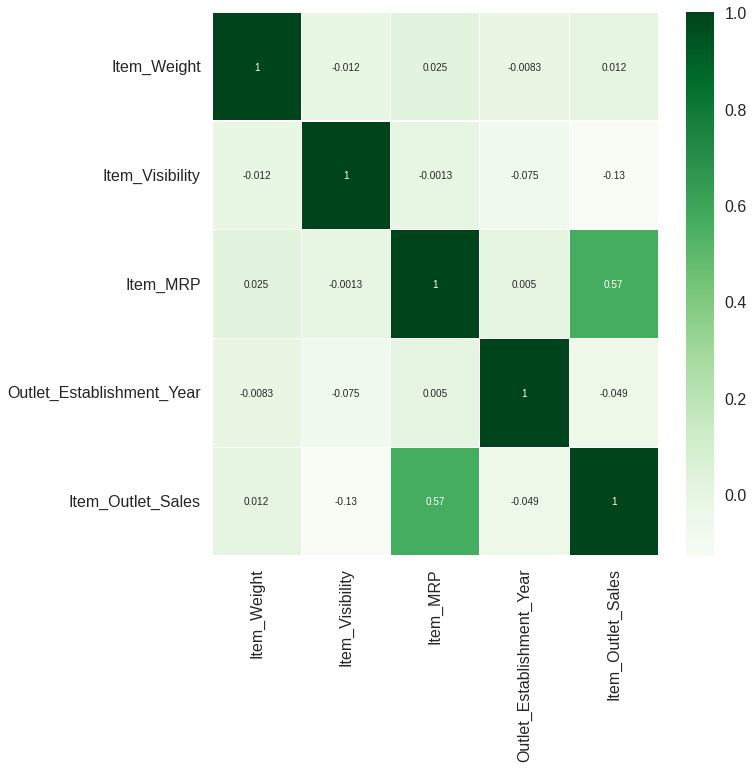

In [270]:
#searching for correlations using heatmap:
#There is mid-to-high positive correlation between maximum retail price and sales for an item.
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10));
plt.xticks(rotation = 45)
print(sns.heatmap(corr, cmap = 'Greens', annot = True, linewidths = .2, ax = ax));


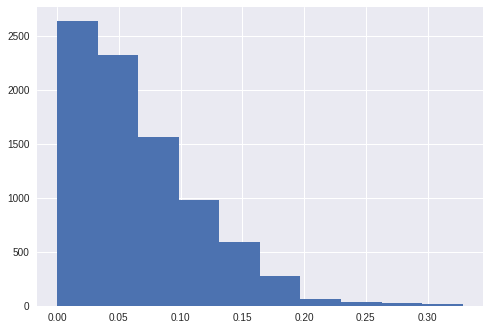

In [271]:
#Histogram of items' visibility
#more items have lower visibility; very few items have 25-30% visinility
plt.style.use('seaborn')
df['Item_Visibility'].hist();

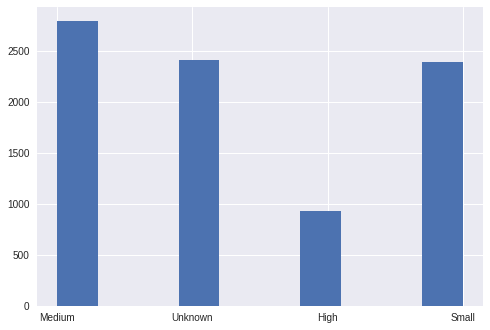

In [272]:
#showing the number of outlets that are different sizes. It looks like most outlets are small to medium, although many are unknown
plt.style.use('seaborn')
df['Outlet_Size'].hist()


Text(0, 0.5, 'Number of Items')

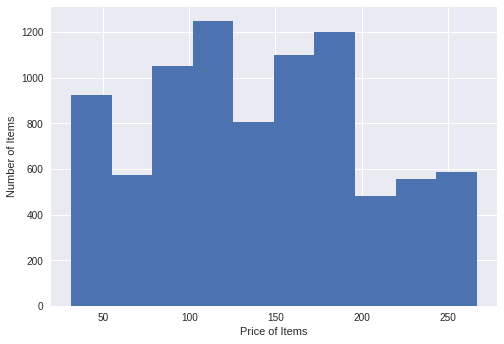

In [273]:
#Showing the market retail prices of items. This data seems unlikely to be useful
plt.style.use('seaborn')
df['Item_MRP'].hist(bins = 10);
plt.xlabel('Price of Items')
plt.ylabel('Number of Items')

Text(0, 0.5, 'Number of Outlets')

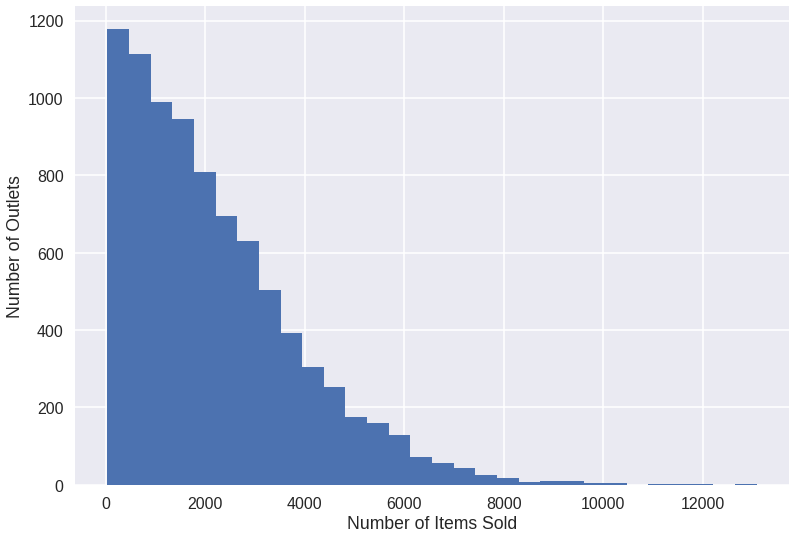

In [274]:
#This shows that there are fewer stores that sell a higher number of items; the majority of outlets have lower sales 
plt.style.use('seaborn-poster')
df['Item_Outlet_Sales'].hist(bins =30);
plt.xlabel('Number of Items Sold')
plt.ylabel('Number of Outlets')

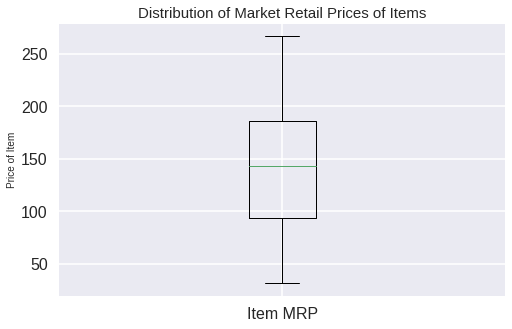

In [275]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplot = axes.boxplot([df['Item_MRP']],
                                  labels=['Item MRP']);
plt.ylabel('Price of Item', fontsize = 10);
plt.title('Distribution of Market Retail Prices of Items', fontsize = 15);

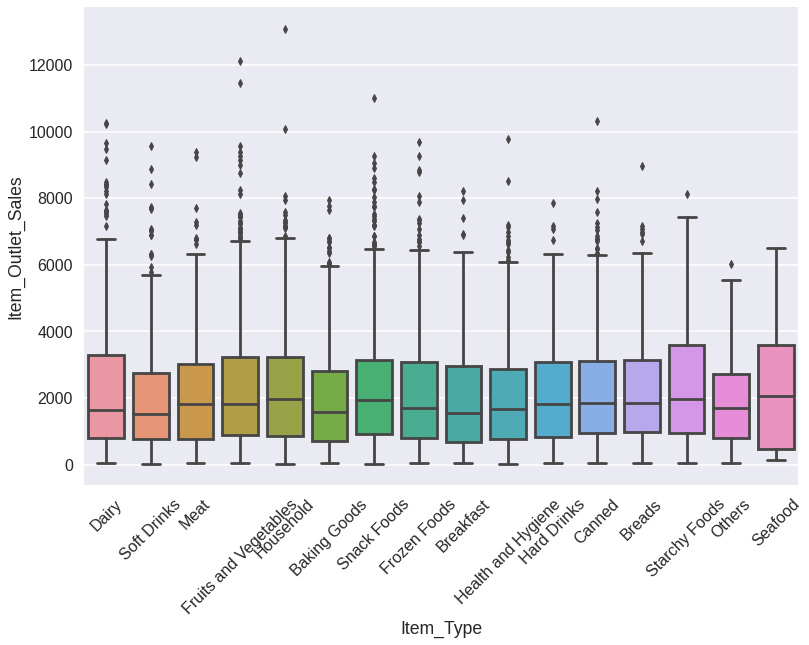

In [237]:
#boxplot to see how much of what types of items are sold by outlet
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(x = df['Item_Type'], y = df['Item_Outlet_Sales']);

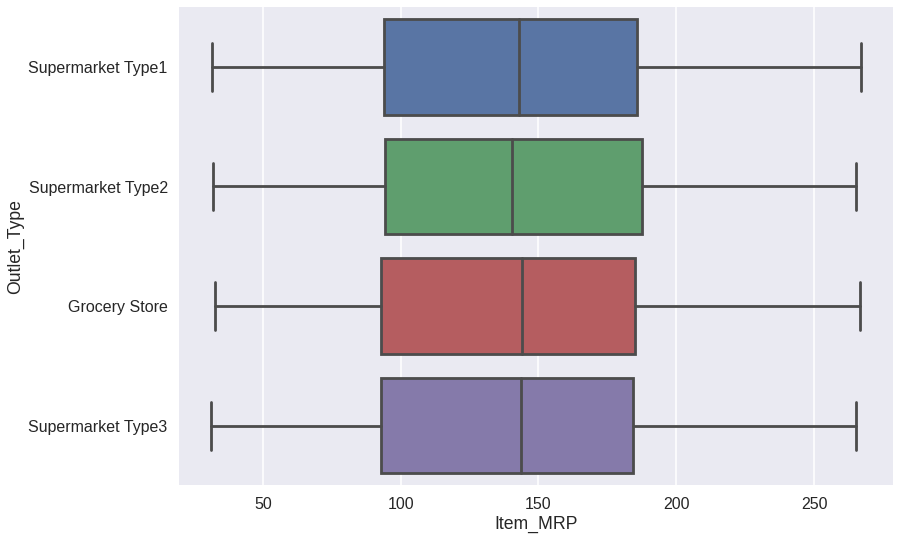

In [238]:
#looking to see if Market retail price of items varies depending on outlet type. It does not.
sns.boxplot(x = df['Item_MRP'], y = df['Outlet_Type']);

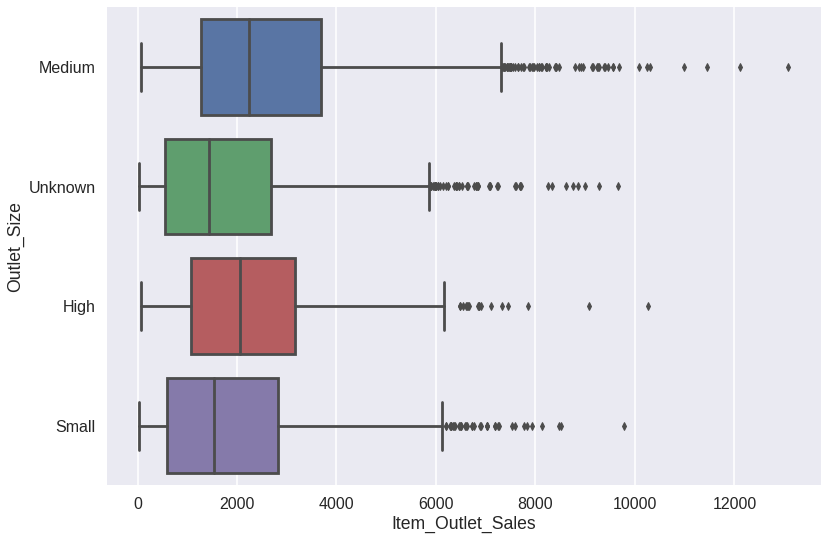

In [239]:
#Same data as a previous histogram, looking at the various in money made from item sales based on outlet size. It appears that Medium-sized outlets overall have the highest sales.
sns.boxplot(x = df['Item_Outlet_Sales'], y = df['Outlet_Size']);

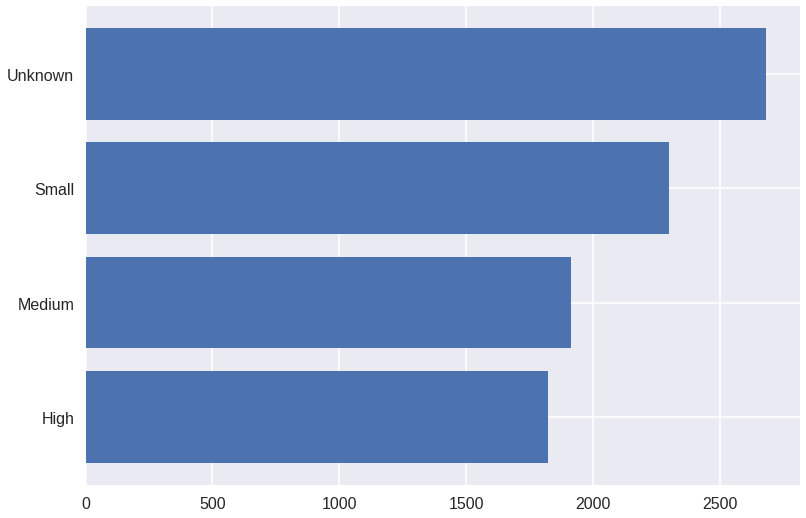

In [240]:
#Another way to represent the above graph, as a bar graph. 
#Medium-sized outlets have the highest mean sales.
newdf = df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().reset_index(name = 'Item sales by Outlet')
#newdf['Item sales by Outlet'].sort_values() 
plt.barh(newdf['Outlet_Size'], newdf['Item sales by Outlet'].sort_values());

In [241]:
#A different way to look at the above data- taking the sum of all sales at outlets by size instead of the mean of sales at outlets by size
newdf2 = df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().reset_index(name = 'Item sales by Outlet')
newdf2

,Outlet_Size,Item sales by Outlet
0,High,2142663.58
1,Medium,7489718.69
2,Small,4566212.20
3,Unknown,4392530.94


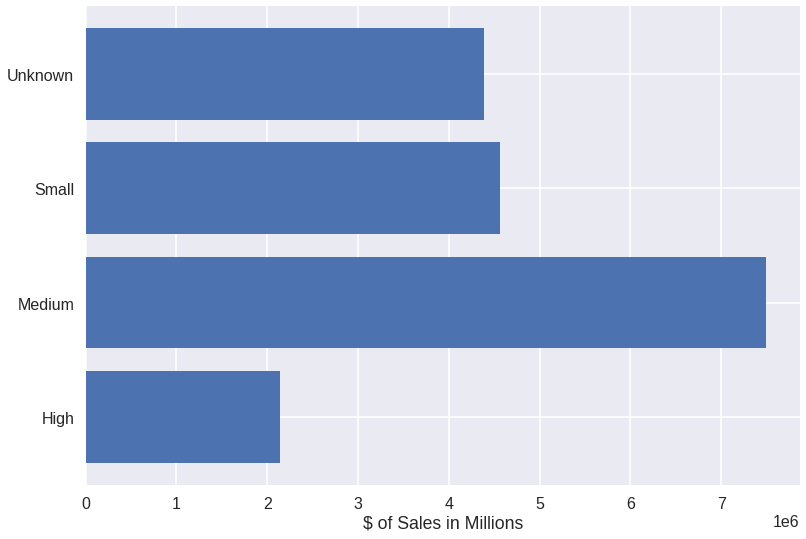

In [242]:
#Medium-sized outlets appear to have the highest dollar-amount of sales
plt.barh(newdf2['Outlet_Size'], newdf2['Item sales by Outlet']);
plt.xlabel('$ of Sales in Millions');
#plt.ticklabel_format(useOffset=False, style='plain') # this line of code caused an error, and I wasn't able to figure out why

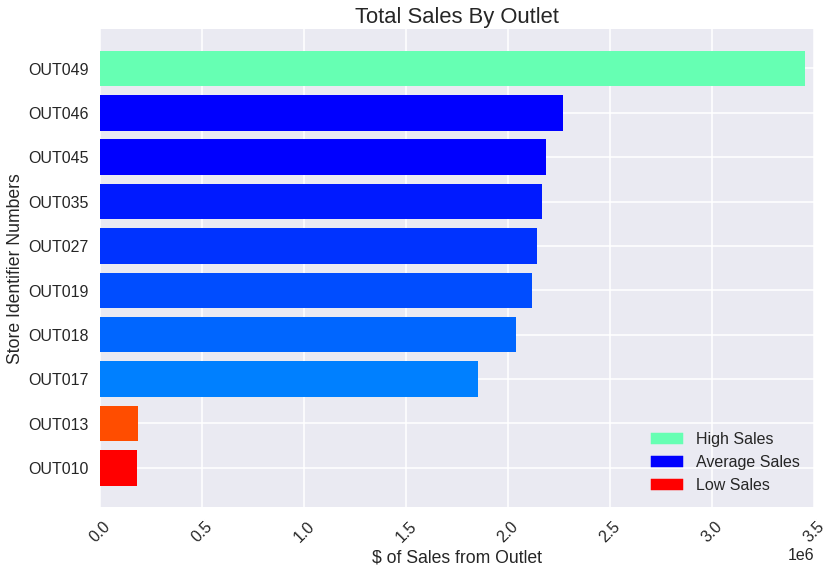

In [243]:
#Week 4: Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
#Data Visualization 1: Total Sales By Outlet
df_sales_by_outlet = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().reset_index(name = 'Item sales by Outlet')
plt.barh(df_sales_by_outlet['Outlet_Identifier'], df_sales_by_outlet['Item sales by Outlet'].sort_values(), 
         color = ((1,0,0), (1,.3,0),(0,.5,1),(0,.4,1),(0,.3,1),(0,.2,1),(0,.1,1),(0,0,1), (0,0,1), (0.4,1,0.7)));
plt.title('Total Sales By Outlet', fontsize = 22);
plt.xlabel('$ of Sales from Outlet');
plt.ylabel('Store Identifier Numbers');
plt.xticks(rotation = 45,);
plt.xlim(0,3500000);
colors = {'High Sales':(0.4,1,0.7), 'Average Sales' : 'blue','Low Sales':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);
# I would like to also be able to take the x axis out of out scientific notation but have not been able to figure that out

Text(0.5, 0, '$ of Sales')

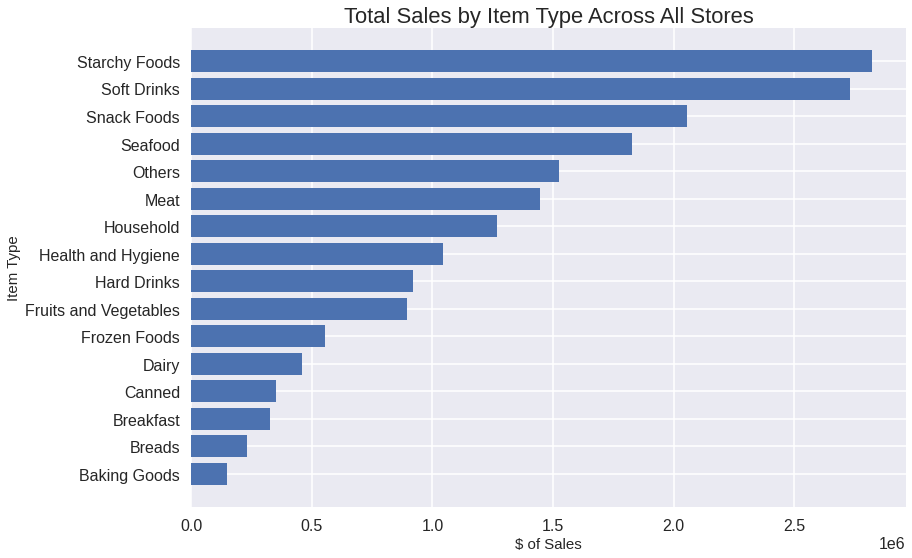

In [244]:
#Data Visualization 2: What types of items make the most money?
#Once again, not able to take x axis out of scientific notation
df_fat_content = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index(name = 'Sales By Item Type')
plt.barh(df_fat_content['Item_Type'], df_fat_content['Sales By Item Type'].sort_values());
plt.title('Total Sales by Item Type Across All Stores', fontsize = 22)
plt.ylabel('Item Type', fontsize = 15)
plt.xlabel('$ of Sales', fontsize = 15)

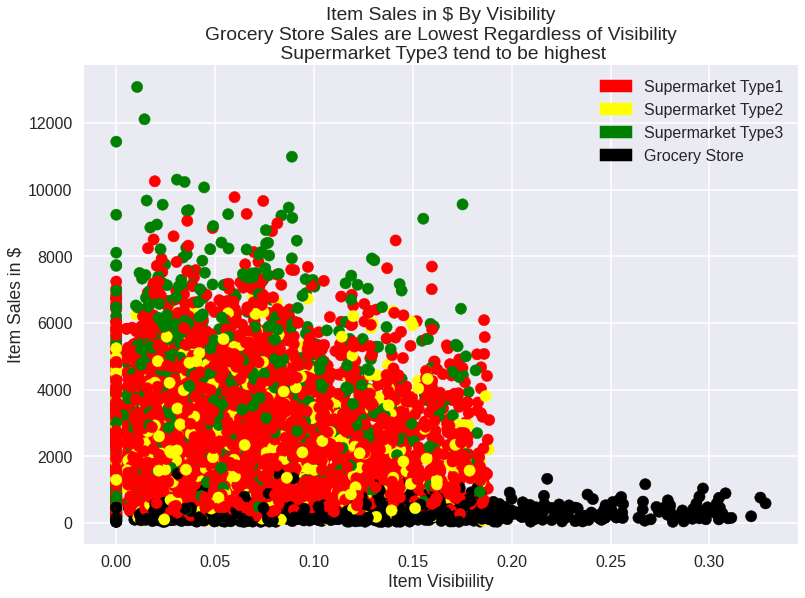

In [245]:
colors = {'Supermarket Type1' : 'Red', 'Supermarket Type2' : 'Yellow', 'Supermarket Type3' : 'Green', 'Grocery Store' : 'black'}
plt.scatter(df['Item_Visibility'].values, df['Item_Outlet_Sales'].values, c=df['Outlet_Type'].map(colors));
plt.xlabel('Item Visibiility')
plt.ylabel('Item Sales in $')
plt.title('Item Sales in $ By Visibility\nGrocery Store Sales are Lowest Regardless of Visibility\n Supermarket Type3 tend to be highest')
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);

Text(0.5, 0, '$ of Sales')

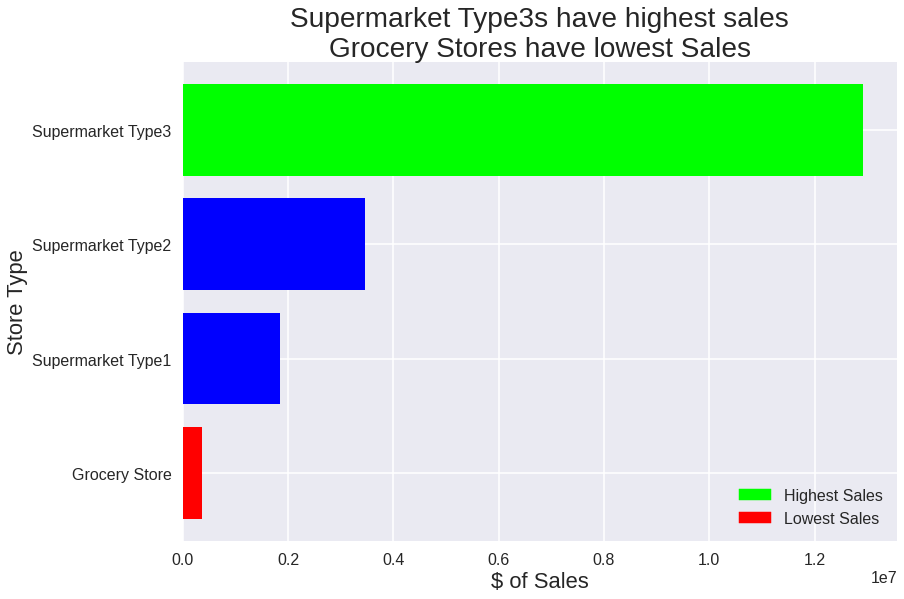

In [246]:
#A better way than the above scatter plot to show that item sales are significantly lower at grocery stores
df_sales_by_outlet_type = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().reset_index(name = 'Sales By Outlet Type')
plt.barh(df_sales_by_outlet_type['Outlet_Type'], df_sales_by_outlet_type['Sales By Outlet Type'].sort_values(),
        color = ((1,0,0), (0,0,1), (0,0,1), (0,1,0)));
colors = {'Highest Sales':(0,1,0), 'Lowest Sales':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);     
plt.title('Supermarket Type3s have highest sales\nGrocery Stores have lowest Sales', fontsize=28)
plt.ylabel('Store Type', fontsize = 22)
plt.xlabel('$ of Sales', fontsize = 22)   

In [247]:
#This cell is an example of me trying to graph some information and then realizing it creates an incomprehensible and useless graph
#What sets OUT049 apart for sales?
#How Does visibility effect sales? 
#What items are most visible for the store with highest sales?
#What items are most visible for the stores with lowest sales?
#df_49 = df[df['Outlet_Identifier'] == 'OUT049']
#df_13 = df[df['Outlet_Identifier'] ==  'OUT013']
#df_10 = df[df['Outlet_Identifier'] == 'OUT010']
#df_visibility_by_item49 = df_49.groupby('Item_Identifier')['Item_Visibility'].sum().reset_index(name = 'Item Visibility')
#df_visibility_by_item13 = df_13.groupby('Item_Identifier')['Item_Visibility'].sum().reset_index(name = 'Item Visibility')
#df_visibility_by_item10 = df_10.groupby('Item_Identifier')['Item_Visibility'].sum().reset_index(name = 'Item Visibility')

#plt.bar(df_visibility_by_item10['Item_Identifier'], df_visibility_by_item10['Item Visibility']);
#plt.bar(df_visibility_by_item13['Item_Identifier'], df_visibility_by_item13['Item Visibility']);
#plt.bar(df_visibility_by_item49['Item_Identifier'], df_visibility_by_item49['Item Visibility']);

#plt.xlabel('Item Type')
#plt.ylabel('Percent Visibility')